In [0]:
from fastai.vision import *

In [5]:
pwd

'/content'

In [0]:
folder = 'terrier'
file = 'urls_terrier.csv'

In [0]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'bulldog'
file = 'urls_bulldog.csv'

In [0]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
cd /content/data/dogs/

/content/data/dogs


In [13]:
ls

bulldog/  terrier/


In [23]:
cd /content/data/dogs/

/content/data/dogs


In [24]:
from google.colab import files
uploaded = files.upload()

Saving urls_bulldog.csv to urls_bulldog.csv
Saving urls_terrier.csv to urls_terrier.csv


In [25]:
ls

bulldog/  terrier/  urls_bulldog.csv  urls_terrier.csv


In [0]:
classes = ['bulldog', 'terrier']

In [0]:
folder = 'terrier'
file = 'urls_terrier.csv'
path = Path('/content/data/dogs')
dest = path/folder

In [28]:
download_images(path/file, dest, max_pics=300)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'bulldog'
file = 'urls_bulldog.csv'
path = Path('/content/data/dogs')
dest = path/folder

In [30]:
download_images(path/file, dest, max_pics=300)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [31]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bulldog


terrier


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['bulldog', 'terrier']

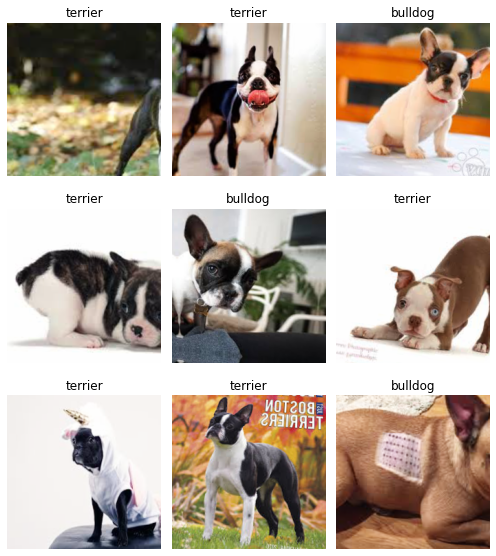

In [34]:
data.show_batch(rows=3, figsize=(7,8))

In [35]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bulldog', 'terrier'], 2, 384, 96)

In [0]:
# Training starts

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [47]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


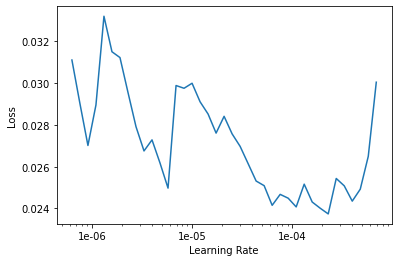

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
learn.save('stage-2')

In [0]:
# INTERPRETATION

In [0]:
learn.load('stage-2');

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

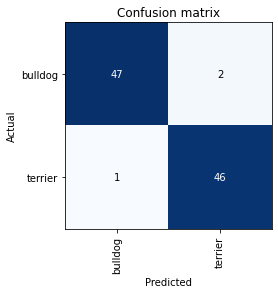

In [57]:
interp.plot_confusion_matrix()

In [0]:
# Cleaning up the data:

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

In [62]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
# Cant run this on Google colab:
#(but it works fine on local environment) 

#ImageCleaner(ds, idxs, path)

In [0]:
# skipping the rest of the cleaning stuff

In [0]:
# Putting the model to production

In [0]:
learn.export()

In [67]:
cd /content/data/dogs

/content/data/dogs


In [0]:
mkdir test

In [69]:
cd test

/content/data/dogs/test


In [70]:
from google.colab import files
uploaded = files.upload()

Saving test1.jpg to test1.jpg


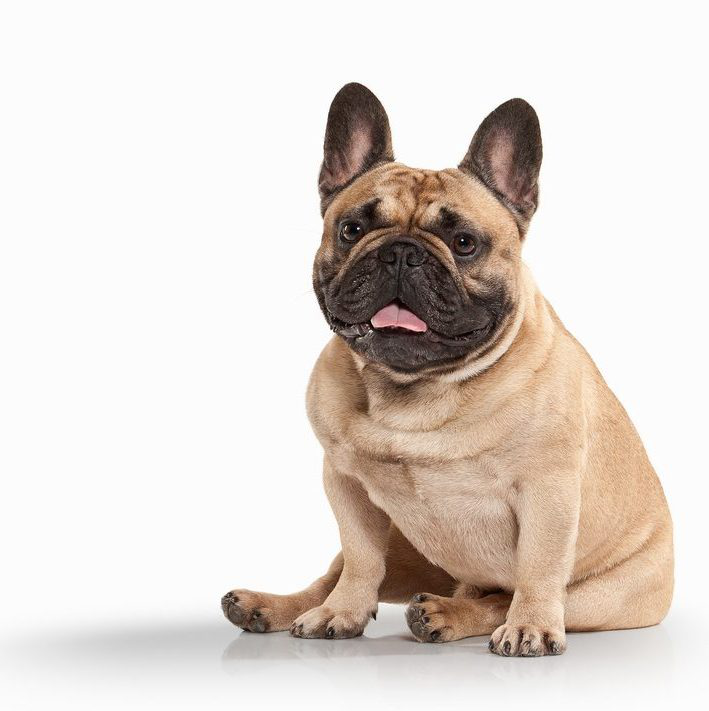

In [71]:
img = open_image('/content/data/dogs/test/test1.jpg')
img

In [0]:
learn = load_learner(path)

In [73]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bulldog

In [0]:
# Correct

In [81]:
from google.colab import files
uploaded = files.upload()

Saving test4.jpg to test4.jpg


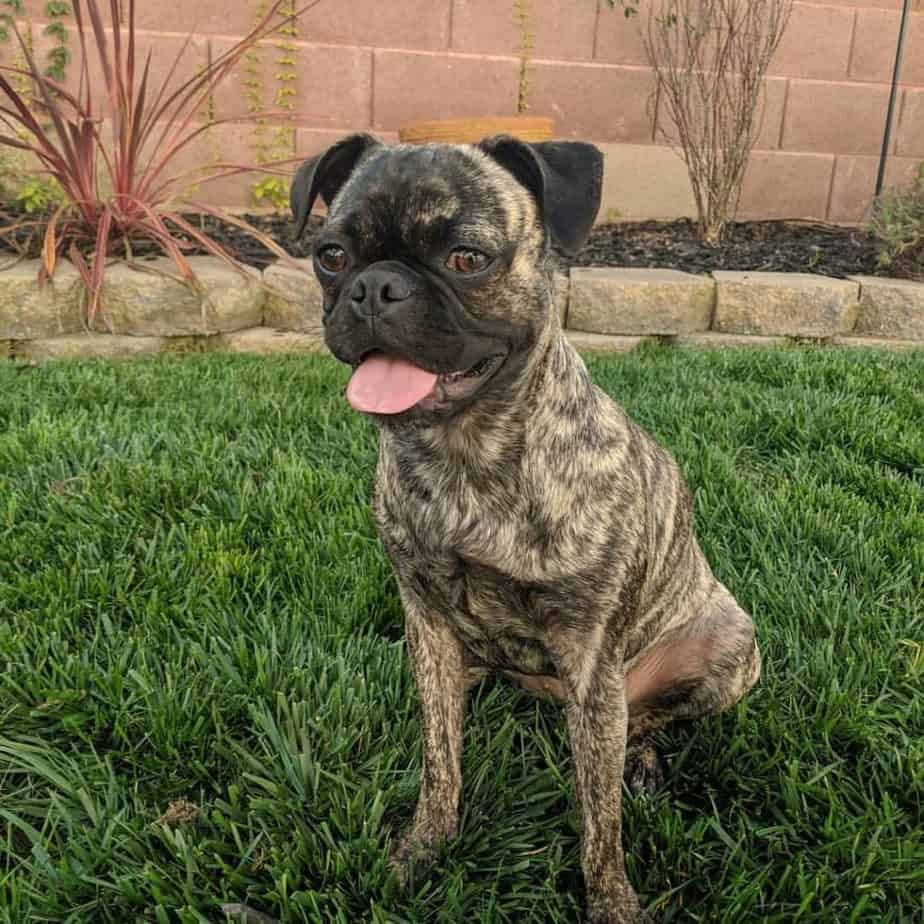

In [76]:
img = open_image('/content/data/dogs/test/test2.jpg')
img

In [77]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bulldog

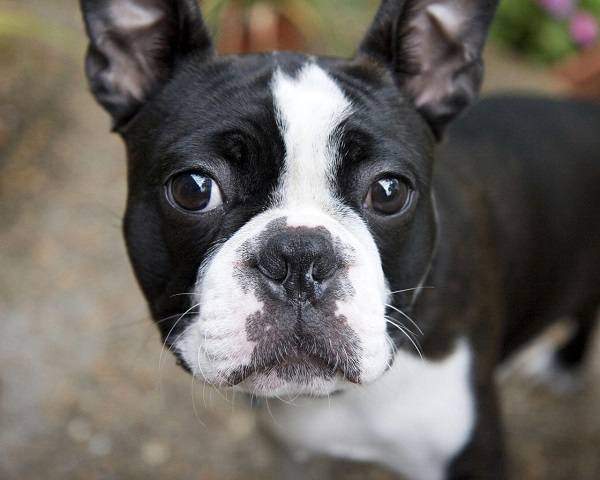

In [79]:
img3 = open_image('/content/data/dogs/test/test3.jpg')
img3

In [80]:
pred_class,pred_idx,outputs = learn.predict(img3)
pred_class

Category terrier

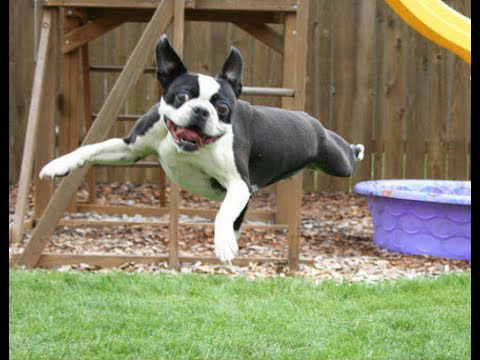

In [82]:
img4 = open_image('/content/data/dogs/test/test4.jpg')
img4

In [83]:
pred_class,pred_idx,outputs = learn.predict(img4)
pred_class

Category terrier